<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy import exp



N = 30

L0 = 2                                                 # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                      # physical domain              

rcol = 1/np.sqrt(L0**2+r**2)-r**2/(L0**2+r**2)**(3/2)          # dcol/dr

rrcol = -3*r/(L0**2+r**2)**(3/2)+3*r**3/(L0**2+r**2)**(5/2)     # d^2 col/dr^2


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+1,N+1])
rSB = np.zeros([N+1,N+1])
rrSB = np.zeros([N+1,N+1])
colSB = np.zeros([N+1,N+1])
ccolSB = np.zeros([N+1,N+1])


Phi = np.zeros([N+1,N+1])
rPhi = np.zeros([N+1,N+1])
rrPhi = np.zeros([N+1,N+1])

Pi = np.zeros([N+1,N+1])
rPi = np.zeros([N+1,N+1])
rrPi = np.zeros([N+1,N+1])

Krr = np.zeros([N+1,N+1])
rKrr = np.zeros([N+1,N+1])
rrKrr = np.zeros([N+1,N+1])

Chi = np.zeros([N+1,N+1])
rChi = np.zeros([N+1,N+1])
rrChi = np.zeros([N+1,N+1])

Alpha = np.zeros([N,N])
rAlpha = np.zeros([N,N])
rrAlpha = np.zeros([N,N])

Beta = np.zeros([N,N])
rBeta = np.zeros([N,N])
rrBeta = np.zeros([N,N])
rBeta_r = np.zeros([N,N])

#SB[0,] = 1
#SB[1,] = colr

for i in range(N+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

#colSB[0,] = 0
#colSB[1,] = 1
#rSB[0,] = rcol*colSB[0,]
#rSB[1,] = rcol*colSB[1,]

#for i in range(1, N+1):
#  colSB[i,] = 2*colr*colSB[i-1,] + 2*SB[i-1,] - colSB[i-2,]
#  rSB[i,] = rcol*colSB[i,]                                                    # colSB[i,] = dSB[i,]/dcol, rcol = dcol/dr

for i in range(N+1):
#  colSB[i,] = 2*colr*colSB[i-1,] + 2*SB[i-1,] - colSB[i-2,]
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

#ccolSB[0,] = 0
#ccolSB[1,] = 0
#rrSB[0,] = rrcol*colSB[0,] + (rcol)**2 * ccolSB[0,]
#rrSB[1,] = rrcol*colSB[1,] + (rcol)**2 * ccolSB[1,]

for i in range(N+1):
#  ccolSB[i,] = 2*colSB[i-1,] + 2*colr*ccolSB[i-1,] + 2*colSB[i-1,] - ccolSB[i-2,]
  rrSB[i,] = np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                       # ccolSB[i,] = d²SB[i,]/dcol²


# Derivada Matriz Base:

#colT[0,] = 0
#colT[1,] = 1

#xT[0,] = xcol*colT[0,]
#xT[1,] = xcol*colT[1,]

#for i in range(2, N+2):
 # colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  #xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx

#psi = T[0:N,:]   
#xpsi = xT[0:N,:]


# Initial conditions of Phi                                       # PhI initial

r0 = 0.5

A0 = 0.0001

sigma = 1

Phi_0 = A0*r**2*np.exp(-(r-r0)**2/sigma**2)            # Phi initial

rPhi_0 = 2*A0*r*np.exp(-(r-r0)**2/sigma**2)-2*A0*r**2*(r-r0)*np.exp(-(r-r0)**2/sigma**2)/sigma**2

inv_SB = np.linalg.inv(SB)
  
a0 = np.dot(Phi_0, inv_SB)  # coeficients a(0)



Phi = np.dot(a0, SB)      # approximative solution in t=0

rPhi= np.dot(a0, rSB)

rrPhi = np.dot(a0, rrSB)


In [67]:
# Plot: Initial Conditions

M = 3000

rplot = np.linspace(0,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

Phi_plot0 = 0.0001*rplot**2*np.exp(-(rplot-0.5)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, SBplot)

erro = (Phiplot - Phi_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


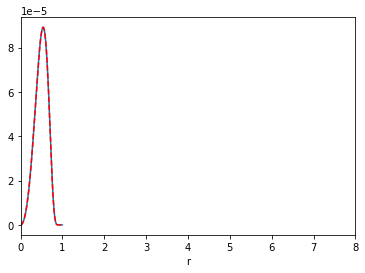

In [ ]:
plt.plot(colplot, Phiplot, colplot, Phi_plot0, "--r")
plt.xlim(0,8)
plt.xlabel('r')
plt.show()

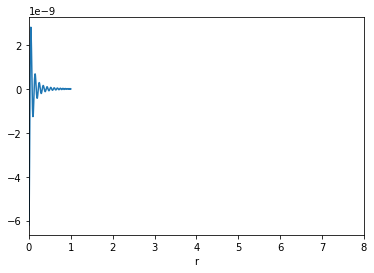

In [ ]:
plt.plot(colplot, erro)
plt.xlim(0,8)
plt.xlabel('r')
plt.show()

In [ ]:
# Initial values of PI:

Pi_0 = np.zeros([N+1])

b0 = np.dot(Pi_0, inv_SB)

Pi = np.dot(b0, SB) 

rPi= np.dot(b0, rSB)

rrPi = np.dot(b0, rrSB)

In [ ]:
# Initial values of Krr:

Krr_0 = 0

SB1 = np.zeros([N+1,N+1])

for i in range(2,N+1):
  SB1[i,] = 2*colr*SB[i-1,] - SB[i-2,]


# Derivada Matriz Base:

#colSB1[0,] = 0
#colSB1[1,] = 1
#rSB1[0,] = rcol*colSB[0,]
#rSB1[1,] = rcol*colSB[1,]

#for i in range(2, N+1):
 # colSB1[i,] = 2*colr*colSB1[i-1,] + 2*SB1[i-1,] - colSB1[i-2,]
  #rSB1[i,] = rcol*colSB1[i,]                                                    # colSB[i,] = dSB[i,]/dcol, rcol = dcol/dr


#ccolSB1[0,] = 0
#ccolSB1[1,] = 0
#rrSB1[0,] = rrcol*colSB1[0,] + (rcol)**2 * ccolSB1[0,]
#rrSB1[1,] = rrcol*colSB1[1,] + (rcol)**2 * ccolSB1[1,]

#for i in range(2, N+1):
 # ccolSB1[i,] = 2*colSB1[i-1,] + 2*colr*ccolSB1[i-1,] + 2*colSB1[i-1,] - ccolSB1[i-2,]
  #rrSB1[i,] = rrcol*colSB1[i,] + (rcol)**2 * ccolSB1[i,]                         # ccolSB[i,] = d²SB[i,]/dcol²



#rpsi = rSB1[0:N,:]
#rrpsi = rrSB1[0:N,:]

inv_SB1 = np.linalg.inv(SB1)

ck0 = np.dot(Krr_0, inv_SB1)

Krr = np.dot(ck0, SB1) 

rKrr = np.dot(ck0, rSB1)

rrKrr = np.dot(ck0, rrSB1)

LinAlgError: ignored

In [72]:
# Initial chi: import from maple csv file

url = 'https://raw.githubusercontent.com/phmouras/Projeto_Pos/main/c0.csv'

df = pd.read_csv(url)


In [73]:
df


,[c[0] = .211244880841937696943103e-8,c[1] = -.442284024660632476355385e-10,c[2] = -.769005646073457343074340e-10,c[3] = -.159616706013650932169404e-10,c[4] = .133880980719994920318739e-10,c[5] = .190868466309229515111930e-10,c[6] = -.138684232287542219591718e-10,c[7] = -.463913559129446223343159e-11,c[8] = .634900108648669015193247e-11,c[9] = .428748873838026027088403e-12,...,c[21] = .143612283376596627960960e-14,c[22] = .132346214126697423708185e-14,c[23] = -.228348377622647423102175e-15,c[24] = -.271610210905355248047529e-15,c[25] = -.231127417588522442577641e-15,c[26] = .123462539704696859177453e-15,c[27] = .272337209824629825382307e-16,c[28] = .502535191663513072176667e-16,c[29] = -.398340467196735966839526e-16,c[30] = -.749513687569356856869926e-17]


In [42]:
c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
## Initial chi: solving the Hamiltonian constraint:
# Newton-Raphson
V=0

#c0 = np.zeros([N+1])
#for i in range(N+1):
#  c0[i] = 0.001

Chi = np.dot(c0, SB)

rChi = np.dot(c0, rSB)

rrChi = np.dot(c0, rrSB)

test_C = 4*rChi**2 + rrChi + 2*rChi/r + 3/4*np.exp(-4*Chi)*Krr_0**2 + np.exp(4*Chi)*(1/2*Pi_0**2 + rPhi_0**2/2/np.exp(4*Chi)+0*V)
#init_chi  = 4*(c0*SB)^2 + (c0*rrSB) + 2*(c0*rSB)/r + 3/4*np.exp(-4*c0*SB)*Krr_0**2 + np.exp(4*c0*SB)*(1/2*Pi_0**2 + rPhi_0**2/2/np.exp(4*c0*SB)+0*V) 

test_J = 8*Chi**2 + rrSB + 2*rSB/r - 3*SB*np.exp(-4*Chi)*Krr_0**2 + 4*SB*np.exp(4*Chi)*((1/2)*Pi_0**2 + (1/2)*rPhi_0**2/np.exp(4*Chi)-2*rPhi_0**2*SB) # Jacobian

# Newton-Raphson Method

N_int = 5

for i,j in range(N_int):
  B2 = np.dot(test_J, c0) - test_C
  B_aum = 
  c0[j+1] = 

c[k-1] = B2[i]
 



SyntaxError: ignored

In [ ]:
# Initial values of alpha:

Alpha_0 = 0

al0 = np.dot(Alpha_0, inv_SB)

Alpha = 1 + np.dot(al0, SB)

rAlpha = np.dot(al0, rSB)

rrAlpha = np.dot(al0, rrSB)

In [ ]:
# Initial values of beta:

Beta_0 = 0

be0 = np.dot(Beta_0, inv_SB)

Beta = np.dot(be0, SB)

rBeta = np.dot(be0, rSB)

rrBeta = np.dot(be0, rrSB)

rBeta_r = np.dot(be0, rSB/r)

Field  Equations

In [ ]:
# Equation for Alpha:

#dAlpha = rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V)

In [ ]:
# Equation for Beta:

dBeta = rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr 

In [ ]:
# Equation for Chi:

#dChi = np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr   # diff(Chi, t)

#dChi = np.dot(np.dot(be0, SB),np.dot(c0, rSB)) + np.dot(be0,SB)/2/r + (1 + np.dot(al0, SB))/4*np.exp(-4*np.dot(c0, SB))*np.dot(ck0, SB)



In [ ]:
# Equation for Krr: momentum constraint

res_eq_Krr = 2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi)

In [ ]:
# Equation for Phi: 

dPhi = np.dot(Alpha,Pi) + np.dot(Beta, rPhi)



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Equation for Pi: KG equation

#dPI = np.dot(Beta, rPI) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V


In [ ]:
# Runge Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])
chi_set = np.zeros([It,M])
Pi_set = np.zeros([It,M])

V = 0

for i in range(It):

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)


########################################################################

  Phi = np.dot(a0 + L1, SB)     
  rPhi= np.dot(a0 + L1 , rSB)
  rrPhi = np.dot(a0 + L1, rrSB)
  
  Pi = np.dot(b0 + N1, SB)
  rPi= np.dot(b0 + N1, rSB)
  rrPi = np.dot(b0 + N1, rrSB)

  Chi = np.dot(c0 + K1, SB)
  rChi = np.dot(c0 + K1, rSB)
  rrChi = np.dot(c0 + K1, rrSB

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)


########################################################################
  Phi = np.dot(a0 + L2, SB)     
  rPhi = np.dot(a0 + L2 , rSB)
  rrPhi = np.dot(a0 + L2, rrSB)
  
  Pi = np.dot(b0 + N2, SB)
  rPi= np.dot(b0 + N2, rSB)
  rrPi = np.dot(b0 + N2, rrSB)

  Chi = np.dot(c0 + K2, SB)
  rChi = np.dot(c0 + K2, rSB)
  rrChi = np.dot(c0 + K2, rrSB)

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)


#####################################################################
  
  Phi = np.dot(a0 + L3, SB)     
  rPhi= np.dot(a0 + L3 , rSB)
  rrPhi = np.dot(a0 + L3, rrSB)
  
  Pi = np.dot(b0 + N3, SB)
  rPi= np.dot(b0 + N3, rSB)
  rrPi = np.dot(b0 + N3, rrSB)

  Chi = np.dot(c0 + K3, SB)
  rChi = np.dot(c0 + K3, rSB)
  rrChi = np.dot(c0 + K3, rrSB)

  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* 0, inv_SB)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_SB)    
  da = np.dot(np.dot(Alpha,Pi) + np.dot(Beta, rPhi), inv_SB)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)

  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  
  
# phi_set[i,:] = np.dot(a0, psiplot)

  


 
  


ValueError: ignored

In [ ]:
Alpha

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,